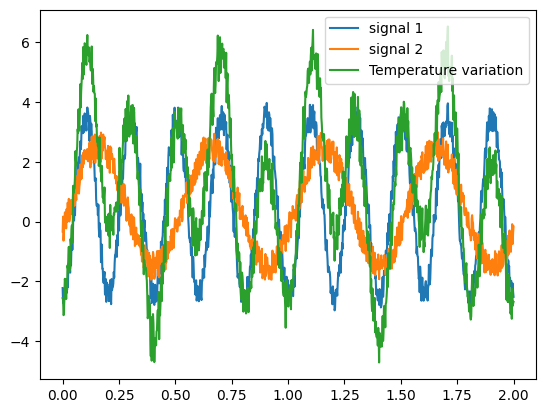

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# phase shift
phi1 = 3
phi2 = -2
# amplitude in degrees Celcius
A1 = 3
A2 = 2
# frequency in Hz
f1 = 5
f2 = 2

N = 1024

t = np.linspace(0,2,N)
y1 = A1*np.cos(2*np.pi*f1*t + phi1)+np.random.rand(N)
y2 = A2*np.cos(2*np.pi*f2*t + phi2)+np.random.rand(N)
y = y1+y2

plt.plot(t,y1,label='signal 1')
plt.plot(t,y2,label=r'signal 2')
plt.plot(t,y1+y2,label='Temperature variation')
plt.legend()
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class E_wrap:
    def __init__(self, N):
        self.array = np.zeros((1+int(np.log2(N)),N),complex)
        self.N = N

    def __getitem__(self, indices):
        m, j, k = indices
        k %= self.N/2**m
        k = int(k)
        return self.array[m,j+2**m*k]

    def __setitem__(self, indices, value):
        m, j, k = indices
        k %= self.N/2**m
        k = int(k)
        self.array[m, j+2**m*k] = value

def fft(y):
    N = len(y)
    E = E_wrap(N)
    E.array[-1,:] = y

    for m in range(int(np.log2(N))-1,-1,-1):
        for j in range(2**m):
            for k in range(N//2**m):
                E[m,j,k] = E[m+1,j,k] + np.exp(-2j*np.pi*k/(N/2**m))*E[m+1,j+2**m,k]
    return E.array[0,:]

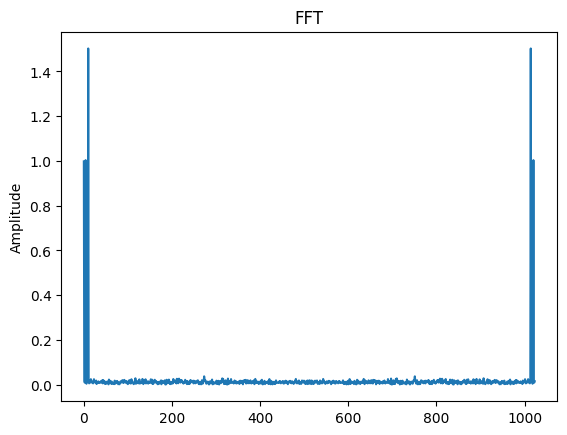

In [25]:
c = fft(y)
plt.plot(abs(c)/N)
plt.title('FFT')
plt.ylabel('Amplitude')
plt.show()

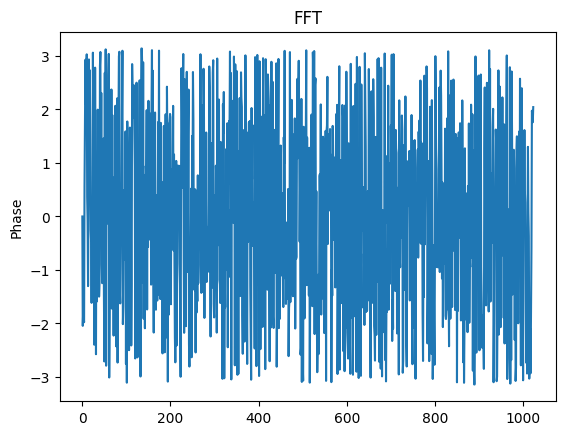

In [15]:
plt.plot(np.angle(c))
plt.title('FFT')
plt.ylabel('Phase')
plt.show()

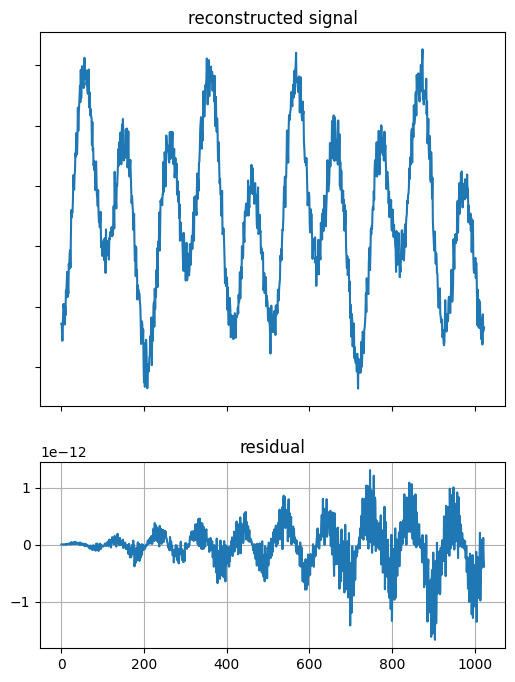

In [26]:
def idft(c):
    yn = np.zeros(N,complex)
    for n in range(N):
        for k in range(N):
          if k<N//2+1:
              cv = c[k]
          else:
              cv = np.conjugate(c[N-k])
          yn[n] += cv*np.exp(2j*np.pi*k*n/N)
    return yn

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8),sharex=True,
                               gridspec_kw={'height_ratios': [2,1]})
ax1.plot(np.real(idft(c/N)))
ax1.set_yticklabels([])
ax1.set_title('reconstructed signal')

ax2.plot(np.real(idft(c/N)-y))
ax2.set_title('residual')
plt.grid()